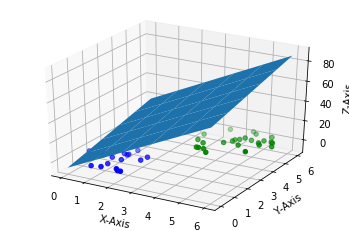

In [2]:
from mpl_toolkits import mplot3d
import numpy as np
from matplotlib import pyplot as plt
import random
import math
import copy


fig = plt.figure()
ax = plt.axes(projection='3d')

t=[]
for i in range(0,50):
    t.insert(i, 0)


#Creating expected output
for i in range(0,50):
    if i<= 24:
        t[i] = 0.
    else:
        t[i] = 1.

#  input x
x1 = np.random.uniform(0,2.5,size=(3,25))

x2 = np.random.uniform(3,6,size=(3,25))

ax.scatter3D(x1[0],x1[1],x1[2], c='b')
ax.scatter3D(x2[0],x2[1],x2[2], c='g')


ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
# ax.set_title("Training a 3 layer neural network")


# Generating random weights 
w1 = random.uniform(-2.0,2)
w2 = random.uniform(-2.0,2)
w3 = random.uniform(-2.0,2)
# bias 
w4 = random.uniform(-2.0,2)

#Learning rate
lr = 0.08

output = []

count = 1
x = np.linspace(0,6,num= 6)
y = np.linspace(0,6,num= 6)
X,Y = np.meshgrid (x,y)
Z = -(w1*X + w2*Y + w4)/w3
surf = ax.plot_surface(X, Y, Z)

plt.show()


Total training steps:  9999
Target = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Actual Output y = [0.003229155318688121, 0.012370266868695776, 0.0012210462487467846, 0.002548520246913157, 0.006970815255501128, 0.0031938950300203837, 0.0002447894024890759, 0.0038538924939195587, 0.06146060275981355, 0.00039392933635349237, 0.006439905288557095, 0.0026494978912338396, 0.009355729755144272, 0.0002772352879698032, 0.0005357460278424966, 0.006768305321844177, 0.009764290150840207, 9.49571044693481e-05, 0.018742526012893487, 0.0003550879113993234, 0.0009540068373179142, 0.0012960966254807022, 0.0006320647710803933, 0.012488605703733486, 0.01254377987499484, 0.9999335169312342, 0.9999441124580243, 0.9960173581269884, 0.9991165239933169, 0.9999530123336402, 0.9998587332343046, 0.9968392334

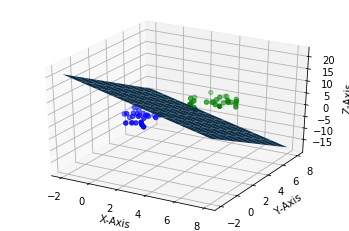

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x1[0],x1[1],x1[2], c='b')
ax.scatter3D(x2[0],x2[1],x2[2], c='g')

ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")

x = np.linspace(-2,8,num= 10)
y = np.linspace(-2,8,num= 10)
X,Y = np.meshgrid (x,y)
Z = -(w1*X + w2*Y + w4)/w3
#surf = ax.plot_surface(X, Y, Z)
xinput = np.random.uniform(0,2.5,size=(3,50))
for i in range(0,25):
    xinput[0,i]=x1[0,i]
    xinput[1,i]=x1[1,i]
    xinput[2,i]=x1[2,i]
for i in range(0,25):
    xinput[0,i+25]=x2[0,i]
    xinput[1,i+25]=x2[1,i]
    xinput[2,i+25]=x2[2,i]


output = []

while (count<10000):
    output = []
    for i in range(0,50):
        
        #  weighted sum
        u = (xinput[0,i]*w1) + (xinput[1,i]*w2) + (xinput[2,i]*w3)+ w4
        
        y = 1.0/( 1 + np.exp(-u))

        #  changes in w's
        dw1 = lr*(xinput[0,i]*(t[i]-y))*(y*(1-y))
        dw2 = lr*(xinput[1,i]*(t[i]-y))*(y*(1-y))
        dw3 = lr*(xinput[2,i]*(t[i]-y))*(y*(1-y))
        dw4 = lr*(t[i]-y)*(y*(1-y))
        
        w1 = w1 + dw1
        w2 = w2 + dw2
        w3 = w3 + dw3
        w4 = w4 + dw4

        output.insert(i,y)
       
        
    x = np.linspace(-2,8,num= 10)
    y = np.linspace(-2,8,num= 10)
    X,Y = np.meshgrid (x,y)
    
    Z = -(w1*X + w2*Y + w4)/w3
    # surf = ax.plot_surface(X, Y, Z)
    count = count + 1
    
surf = ax.plot_surface(X, Y, Z)

print("Total training steps: ", count-1)
print ("Target =", t)
print ("Actual Output y =", output)
plt.show()
